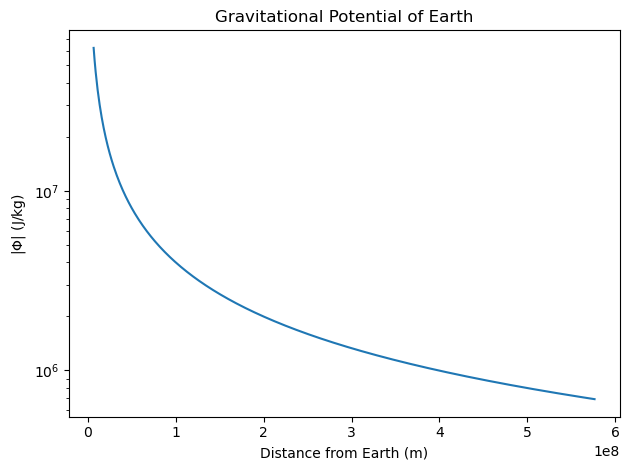

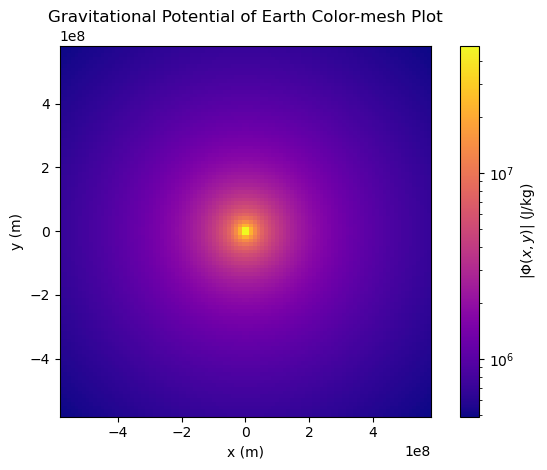

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# gravitational potential function
def phi(M, xm, ym, x, y):
    G = 6.67e-11
    r = np.sqrt((xm - x)**2 + (ym - y)**2)

    r = np.where(r < 1e-6, 1e-10, r)

    ph = -G * M / r
    return ph

# 1D plot of absolute value of phi
M_e = 5.972e24 # kg
R_e = 6.378e6 # m
d = 3.844e8 # m
G = 6.67e-11 # N*m^2/kg^2

x_vals = np.linspace(R_e,1.5 * d,500)
phi_vals = np.abs([phi(M_e,0,0,x,0) for x in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals,phi_vals)
ax.set_yscale("log")
ax.set_xlabel("Distance from Earth (m)")
ax.set_ylabel(r"$|\Phi|$ (J/kg)")
ax.set_title("Gravitational Potential of Earth")
fig.tight_layout()

# 2D color-mesh plot of potential with Earth at origin
x_range = np.linspace(-1.5 * d, 1.5 * d, 100)
y_range = np.linspace(-1.5 * d, 1.5 * d, 100)
X, Y = np.meshgrid(x_range, y_range)
Phi = np.abs(phi(M_e,0,0,X,Y))

fig2, ax2 = plt.subplots()
color = ax2.pcolormesh(X,Y,Phi,cmap="plasma",norm=mcolors.LogNorm())

ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
ax2.set_title("Gravitational Potential of Earth Color-mesh Plot")
ax2.set_aspect('equal')
fig2.colorbar(color,ax=ax2,label=r"$|\Phi(x, y)|$ (J/kg)")
fig2.tight_layout()

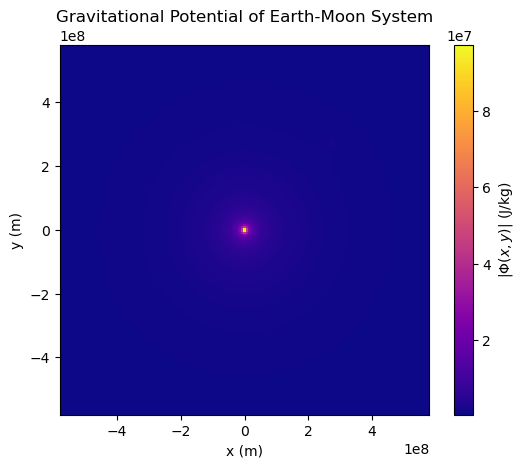

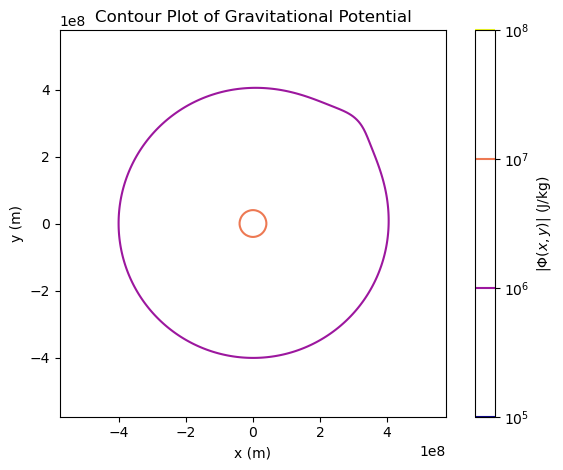

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 2D color-mesh plot of potential of Earth-Moon system
M_e = 5.972e24 # kg
M_m = 7.348e22 # kg
d = 3.844e8 # m
G = 6.67e-11 # N*m^2/kg^2

x_moon = d / np.sqrt(2)
y_moon = d / np.sqrt(2)

def phi_total(x, y):
    r_earth = np.sqrt(x**2 + y**2)
    r_moon = np.sqrt((x - x_moon)**2 + (y - y_moon)**2)
    
    r_earth = np.where(r_earth < 1e6, 1e6, r_earth)
    r_moon = np.where(r_moon < 1e6, 1e6, r_moon)
    
    return -G * M_e / r_earth - G * M_m / r_moon

x_range = np.linspace(-1.5 * d, 1.5 * d, 200)
y_range = np.linspace(-1.5 * d, 1.5 * d, 200)
X, Y = np.meshgrid(x_range, y_range)
Phi = phi_total(X, Y)

fig, ax = plt.subplots()
color = ax.pcolormesh(X, Y, np.abs(Phi), cmap="plasma", shading='auto')
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("Gravitational Potential of Earth-Moon System")
ax.set_aspect('equal')
fig.colorbar(color, ax=ax, label=r"$|\Phi(x, y)|$ (J/kg)")
plt.show()

# 2D contour plot
fig2, ax2 = plt.subplots()
contour = ax2.contour(X, Y, np.abs(Phi), levels=50, cmap="plasma",norm=mcolors.LogNorm())
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
ax2.set_title("Contour Plot of Gravitational Potential")
ax2.set_aspect('equal')
fig2.colorbar(contour, ax=ax2, label=r"$|\Phi(x, y)|$ (J/kg)")
fig2.tight_layout()

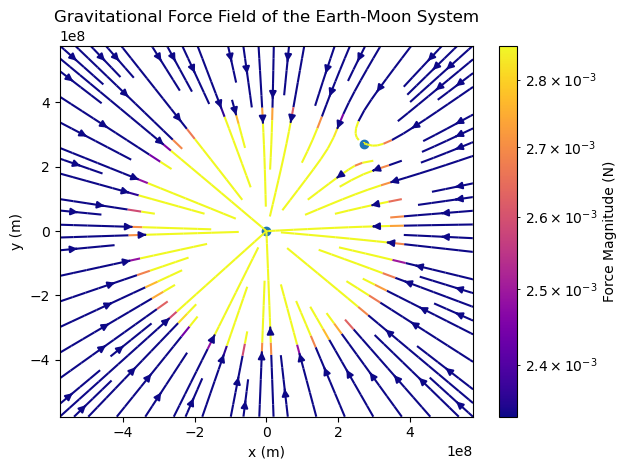

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M_e = 5.972e24 # kg
M_m = 7.348e22 # kg
d = 3.844e8 # m

# gravitational force equation
def F(M1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    
    rx = x2 - x1
    ry = y2 - y1
    r = np.sqrt(rx**2 + ry**2)
    r = np.where(r < 1e-6, 1e-10, r)

    f = -G * M1 * m2 / r**2
    Fx = f * (rx / r)
    Fy = f * (ry / r)
    return Fx, Fy

# 2D streamplot plot
x_e, y_e = 0,0
x_m, y_m = d / np.sqrt(2), d / np.sqrt(2)

Fx_e, Fy_e = F(M_e,1,x_e,y_e,X,Y)
Fx_m, Fy_m = F(M_m,1,x_m,y_m,X,Y)

Fx_tot = Fx_e + Fx_m
Fy_tot = Fy_e + Fy_m

Fmag = np.sqrt(Fx_tot**2 + Fy_tot**2)

fig, ax = plt.subplots()
color = ax.streamplot(X,Y,Fx_tot,Fy_tot,color=Fmag,cmap="plasma",norm=mcolors.LogNorm())
ax.scatter([x_e,x_m], [y_e,y_m])
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("Gravitational Force Field of the Earth-Moon System")
fig.colorbar(color.lines, ax=ax, label="Force Magnitude (N)")
fig.tight_layout()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Calculate burn time
m0 = 2.8e6 # kg
mf = 7.5e5 # kg
mdot = 1.3e4 # kg/s

T = (m0 - mf) / mdot
print("T =", T)

# Change in velocity function
ve = 2.4e3  # m/s
g = 9.81  # m/s^2

def delta_v(t, m0, mdot, ve, g):
    m_t = m0 - mdot * t
    if m_t <= mf:
        return 0
    else:
        return ve * np.log(m0 / m_t) - (g * t)

# Compute rocket altitude
h, error = scipy.integrate.quad(delta_v, 0, T, args=(m0, mdot, ve, g))
print("h =", h)

T = 157.69230769230768
h = 74093.98013366401
